In [ ]:
# This tests the use of a Fizeau PSF as the smoothing kernel for determining the S/N
# of our Altair/Fizeau dataset

# Created 2019 Feb 23 by E.S.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
from mpl_toolkits.mplot3d import Axes3D # This import has side effects required for the kwarg projection='3d' in the call to fig.add_subplot
%matplotlib inline

In [3]:
# First, check that a manually-made Gaussian is consistent with that of scipy

In [4]:
# Make an image of noise

image_noise_original = np.random.rand(100,200)

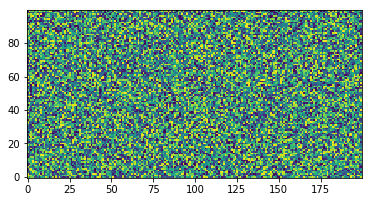

In [5]:
plt.imshow(image_noise_original, origin="lower")
plt.show()

In [6]:
# Smooth it with a Gaussian filter

sig_y = 3
sig_x = 7
image_smoothed_1 = scipy.ndimage.filters.gaussian_filter(image_noise_original, 
                                                 sigma = np.multiply(0.1,[sig_y, sig_x]), 
                                                 order=0, 
                                                 output=None, 
                                                 mode='reflect', 
                                                 cval=0.0, 
                                                 truncate=4.0)

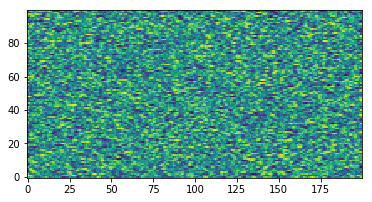

In [7]:
plt.imshow(image_smoothed_1, origin="lower")
plt.show()

In [8]:
np.shape(image_smoothed_1)

(100, 200)

In [9]:
# Define the filter manually

In [10]:
def gaussian_shape(x,y,x0,y0,sig_x,sig_y):
    
    A_part = np.divide(1.,(2*np.pi*sig_x*sig_y))
    exp_part = np.exp(-0.5*(  np.power(np.divide(x-x0,sig_x),2.) + 0.5*np.power(np.divide(y-y0,sig_y),2.)  ))
    
    return A_part*exp_part

In [11]:
def gaussian_shape_smaller(x,y,x0,y0,sig_x,sig_y):
    
    A_part = np.divide(1.,(2*np.pi*sig_x*sig_y))
    exp_part = np.exp(-0.5*(  np.power(np.divide(x-x0,0.1*sig_x),2.) + 0.5*np.power(np.divide(y-y0,0.1*sig_y),2.)  ))
    
    return A_part*exp_part

In [12]:
gaussian_shape(x=47.,y=55.,x0=50.,y0=40.,sig_x=70.,sig_y=30.)

7.113094687115455e-05

In [13]:
np.divide(47-50,70)

-1

In [14]:
# for a certain pixel (y,x), find the weights of other pixels

# look at pixel (40,50)
x_this = 50.
y_this = 40.
sig_x = 7.
sig_y = 3.

X, Y = np.meshgrid(np.arange(0,np.shape(image_smoothed_1)[1]), np.arange(0,np.shape(image_smoothed_1)[0]))
Z_unnorm = np.ones(np.shape(image_noise_original)) # initialize an array

for x_i in range(0,np.shape(image_smoothed_1)[1]):
    for y_j in range(0,np.shape(image_smoothed_1)[0]):
        #Z_unnorm[y_j,x_i] = gaussian_shape(x_i,y_j,x_this,y_this,sig_x,sig_y)
        Z_unnorm[y_j,x_i] = gaussian_shape_smaller(x_i,y_j,x_this,y_this,sig_x,sig_y)

# normalize to an integral of 1
Z_norm = np.divide(Z_unnorm,np.sum(Z_unnorm))

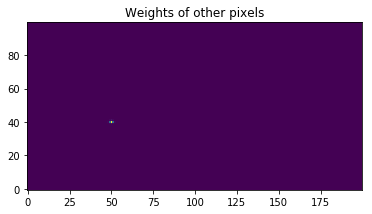

In [20]:
plt.imshow(Z_norm, origin="lower")
plt.title("Weights of other pixels")
plt.show()

In [15]:
# for a certain pixel (y,x), calculate the weighted average to replace that pixel value

# look at pixel (40,50)
x_this = 50.
y_this = 40.
sig_x = 7.
sig_y = 3.

weighted_avg = 0 # initialize

# loop over all pixels to add their contributions
for x_i in range(0,np.shape(image_noise_original)[1]):
    for y_j in range(0,np.shape(image_noise_original)[0]):
        weighted_avg += image_noise_original[y_j,x_i] * gaussian_shape(x_i,y_j,x_this,y_this,sig_x,sig_y)

In [34]:
# now find the weighted average for EACH pixel 

# look at pixel (40,50)
x_this = 50.
y_this = 40.
sig_x = 7.
sig_y = 3.

image_smoothed_2 = np.zeros(np.shape(image_smoothed_1))

def smooth_manual(x_this,y_this):
    weighted_avg = 0 # initialize
    # loop over all pixels to add their contributions
    for x_i in range(0,np.shape(image_noise_original)[1]):
        for y_j in range(0,np.shape(image_noise_original)[0]):
            weighted_avg += image_noise_original[y_j,x_i] * gaussian_shape(x_i,y_j,x_this,y_this,sig_x,sig_y)
            image_smoothed_2[y_this,x_this] = weighted_avg

In [35]:
smooth_manual_vec = np.vectorize(smooth_manual)

In [38]:
X2, Y2 = np.meshgrid(np.arange(0,3), np.arange(0,3))
smooth_manual_vec(X2, Y2)

array([[None, None, None],
       [None, None, None],
       [None, None, None]], dtype=object)

In [23]:
plt.imshow(image_smoothed_2, origin="lower")
plt.title("Smoothed image, manual")
plt.show()

0.7617518664375807

In [25]:
image_noise_original[y_j,x_i]

0.04975611596631879

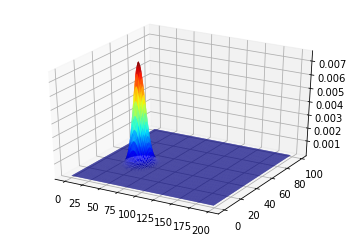

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
plt.show()

In [ ]:
# The manual way I did it was stupid; just use a discrete convolution, which is the same thing

In [16]:
weights = Z_norm[20:60,25:75]

In [17]:
## This here is what I want

test = ndimage.filters.convolve(image_noise_original, weights, output=None, mode='reflect', cval=0.0, origin=0) 

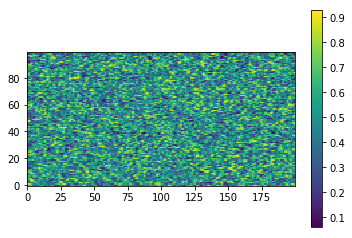

In [18]:
plt.imshow(test, origin="lower")
plt.colorbar()
plt.show()

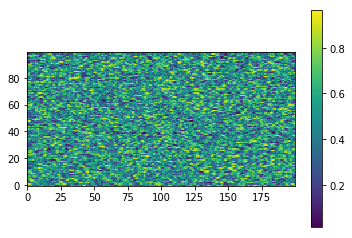

In [19]:
plt.imshow(image_smoothed_1, origin="lower")
plt.colorbar()
plt.show()

In [ ]:
# Define a LBT Fizeau weight

In [ ]:
# Smooth the image with it